In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
import statistics
import numpy as np



In [8]:
#files to load
city_data_to_load= os.path.join("Resources", "city_data.csv")
city_data_df= pd.read_csv(city_data_to_load)
ride_data_to_load= os.path.join("Resources", "ride_data.csv")
ride_data_df= pd.read_csv(ride_data_to_load)

In [9]:
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [11]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [12]:
#get all the columns and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [13]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [15]:
#get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [16]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [17]:
sum(city_data_df["type"]== "Urban")

66

In [18]:
sum(city_data_df["type"]== "Suburban")

36

In [19]:
sum(city_data_df["type"]== "Rural")

18

In [20]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [22]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [24]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [30]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how= "left", on= ["city", "city"])

In [32]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df= pyber_data_df[pyber_data_df["type"]== "Suburban"]
rural_cities_df= pyber_data_df[pyber_data_df["type"]== "Rural"]

In [33]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [39]:
#ride count per city type

urban_ride_count= urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count= suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count= rural_cities_df.groupby(["city"]).count()["ride_id"]

In [42]:
#average ride price

urban_avg_fare= urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare= suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare= rural_cities_df.groupby(["city"]).mean()["fare"]

In [43]:
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [51]:
urban_avg_driver= urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_avg_driver= suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_avg_driver= rural_cities_df.groupby(["city"]).mean()["driver_count"]

In [50]:
urban_avg_driver

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

Text(42, 35, 'Note:\nCircle size correlates\nwith driver count per city.')

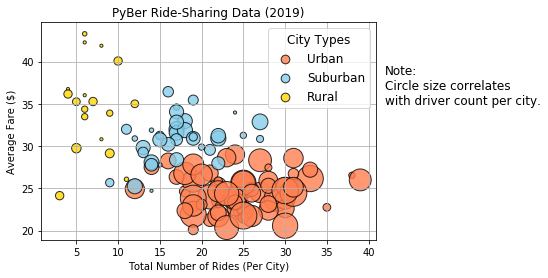

In [63]:
#create scatter plot for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, 
            s= 10*urban_avg_driver, c= "coral", 
            edgecolor= "black", linewidths=1, 
            alpha= 0.8, label = "Urban")


plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_avg_driver, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")


plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_avg_driver, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

#incorporate the graph properties
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)


# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#position of the note to the side of the plot
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")
plt.savefig("Analysis/fig1.png")